<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


#### Setup: Working with the Database
**Install and import the needed libraries**


In [1]:
!pip install pandas 
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows of the data to understand its structure
df.head()


--2025-09-09 20:53:08--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  56.5MB/s    in 2.7s    

2025-09-09 20:53:11 (56.5 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [3]:
# Creating the RDBMS connection for querying data
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)

65437

In [4]:
## This will hold all mapping data so one time run into Kernal
## And single time loading

# Mapping for SOPartFreq
mapping_partfreq = {
    'Daily or almost daily': 'Daily or Semi-Daily',
    'Multiple times per day': 'Multiple / Day',
    'A few times per week': 'Multiple / Week',
    'Less than once per month or monthly': 'Monthly',
    'A few times per month or weekly': 'Multiple / Month',
    'I have never participated in Q&A on Stack Overflow ': 'Never'
}

# Mapping of Age to String Grouping
mapping_age_text = {
    "Under 18 years old": 'Under 18',
    "18-24 years old": '18-24',
    "25-34 years old": '25-34',
    "35-44 years old": '35-44',
    "45-54 years old": '45-54',
    "55-64 years old": '55-64',
    "65 years or older": '65 Over',
    'Prefer not to say': np.nan
}

# Mapping of Age to int
mapping_age_int = {
    "Under 18 years old": 18,
    "18-24 years old": (18+24)/2,
    "25-34 years old": (25+34)/2,
    "35-44 years old": (35+44)/2,
    "45-54 years old": (45+54)/2,
    "55-64 years old": (55+64)/2,
    "65 years or older": 65,
    'Prefer not to say': np.nan
}

# Mapping of YearsProCode to int
mapping_codeyears = {
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}

# Mapping of Employment
mapping_employment ={
    'Employed, full-time': 'Full-Time',
    'Independent contractor, freelancer, or self-employed': 'Independant',
    'Employed, part-time': 'Part-Time',
    'Retired': 'Retired',
    'Not employed, but looking for work': 'Unemployed'
}

# Mapping of Long Named Countries
mapping_country = {
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'Russian Federation': 'Russia'
}

# Mapping for Employment Type (Top 5) (DevType)
mapping_devtype = {
    'Developer, full-stack': 'Full-Stack Dev.',
    'Developer, back-end': 'Back-End Dev.',
    'Developer, front-end': 'Front-End Dev.',
    'Developer, desktop or enterprise applications': 'Desktop/Enterprise Dev.',
    'Developer, mobile': 'Mobile Dev.',
    'Developer, embedded applications or devices': 'Embedded Aps./Devices',
    'Other (please specify)': 'Other',
    'Engineering manager': 'Eng. Manager',
    'Data engineer': 'Data Eng.',
    'DevOps specialist': 'DevOps',
    'Data scientist or machine learning specialist': 'Data/ML Spec.',
    'Research & Development role': 'Research & Dev.',
    'Academic researcher': 'Academic Researcher',
    'Senior Executive (C-Suite, VP, etc.)': 'Senior Exec.',
    'Cloud infrastructure engineer': 'Cloud Infrastructure Eng.',
    'Developer, QA or test': 'QA/Testing Dev.',
    'Developer, game or graphics': 'Gaming/Graphics Dev.',
    'Developer, AI': 'AI Dev.',
    'Data or business analyst': 'Data/Business Analyst',
    'Engineer, site reliability': 'Site Reliability Eng.',
    'System administrator': 'System Admin.',
    'Project manager': 'Project Manager',
    'Security professional': 'Security Pro.',
    'Scientist': 'Scientist',
    'Student': 'Student',
    'Developer Experience': 'Dev. Experience',
    'Educator': 'Educator',
    'Blockchain': 'Blockchain',
    'Product manager': 'Product Manager',
    'Hardware Engineer': 'Hardware Eng.',
    'Developer Advocate': 'Advocate Dev.',
    'Database administrator': 'Database Admin.',
    'Designer': 'Designer',
    'Marketing or sales professional': 'Marketing/Sales Pro.'
}

### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


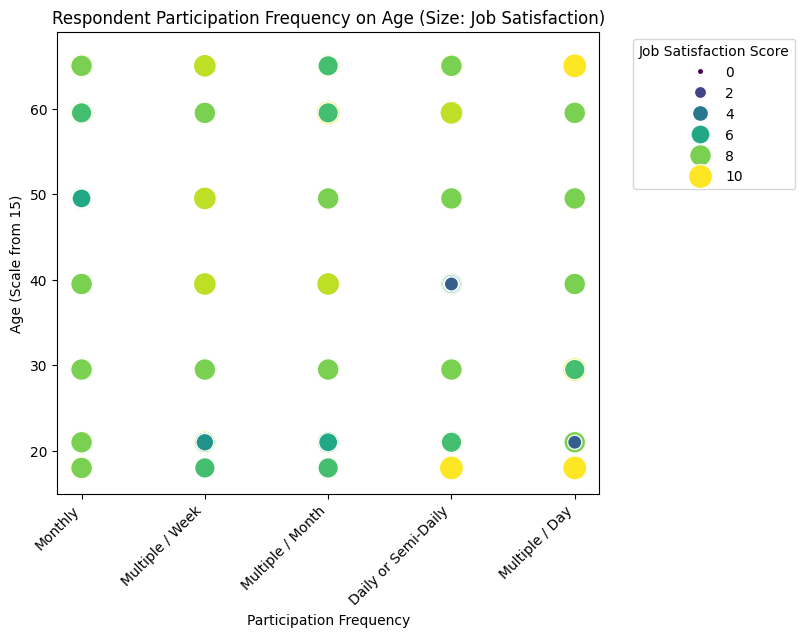

In [5]:
## Write your code here
# Pulling Data
query = '''
SELECT Age, SOPartFreq, JobSat
FROM main
WHERE Age IS NOT NULL
AND SOPartFreq IS NOT NULL
AND JobSat IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Cleaning Data
df['SOPartFreq'] = df.loc[:, 'SOPartFreq'].map(mapping_partfreq)
df['Age'] = df.loc[:, 'Age'].map(mapping_age_int)
df.dropna(subset=['Age'], inplace=True)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')


# Plotting Data
plt.figure(figsize=(7,6))
sns.scatterplot(data=df, x='SOPartFreq', y='Age', size='JobSat',
                sizes=(20, 300), hue='JobSat', palette='viridis')
plt.title('Respondent Participation Frequency on Age (Size: Job Satisfaction)')
plt.xlabel('Participation Frequency')
plt.ylabel('Age (Scale from 15)')
plt.ylim(15, 69)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Satisfaction Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### 2. Bubble Plot for Compensation vs. Job Satisfaction


- Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


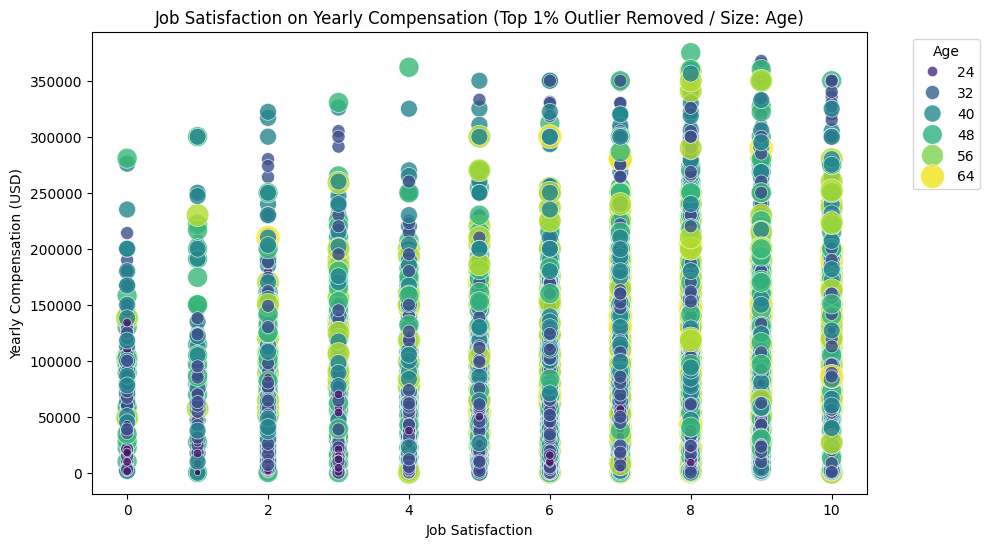

In [6]:
## Write your code here
# Pulling Data
query = '''
SELECT Age, ConvertedCompYearly, JobSat
FROM main
WHERE Age IS NOT NULL
AND ConvertedCompYearly IS NOT NULL
AND JobSat IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Cleaning Data
df = df[df['ConvertedCompYearly'] < df['ConvertedCompYearly'].quantile(0.99)]
df['Age'] = df.loc[:, 'Age'].map(mapping_age_int)
df.dropna(subset=['Age'], inplace=True)
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Plotting Data
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='JobSat', y='ConvertedCompYearly', size='Age',
                sizes=(20, 300), hue='Age', palette='viridis', alpha=0.8)
plt.title('Job Satisfaction on Yearly Compensation (Top 1% Outlier Removed / Size: Age)')
plt.xlabel('Job Satisfaction')
plt.ylabel('Yearly Compensation (USD)')
plt.legend(title='Age', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



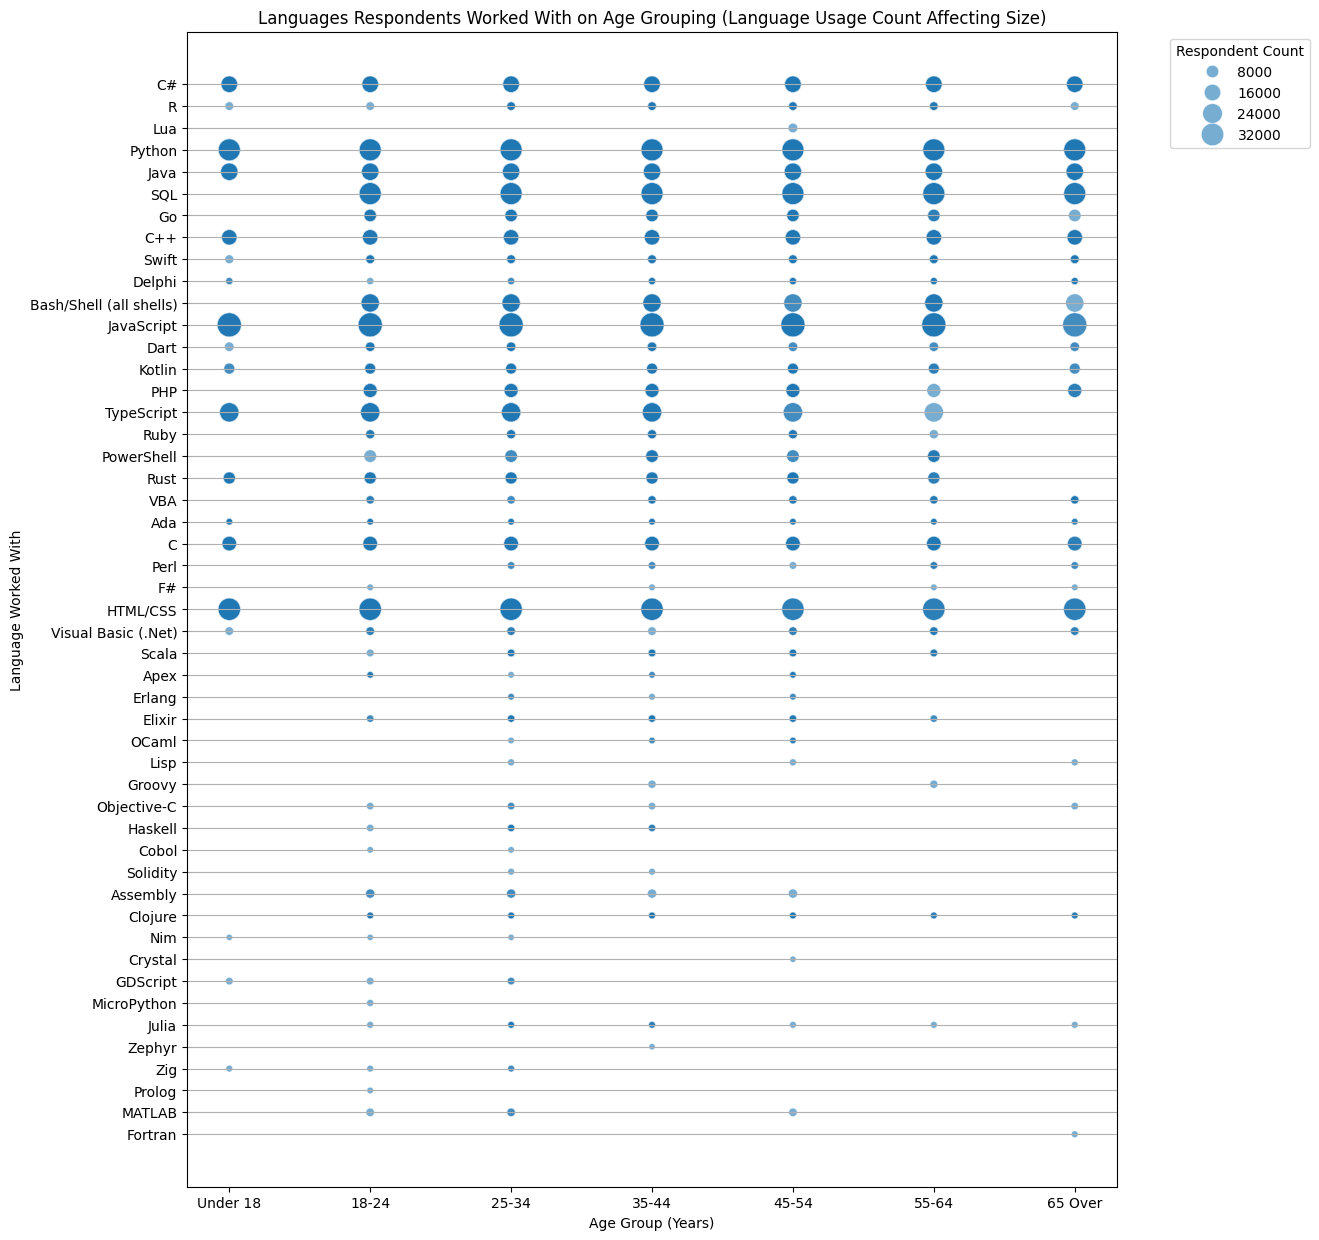

In [7]:
## Write your code here
# Pulling Data
query = '''
SELECT Age, LanguageHaveWorkedWith
FROM main
WHERE Age IS NOT NULL
AND LanguageHaveWorkedWith IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Cleaning Data
df['Age'] = df.loc[:, 'Age'].map(mapping_age_text)
df.dropna(subset=['Age'], inplace=True)
df['LanguageList'] = df['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df.explode('LanguageList')
df_exploded['LanguageList'] = df_exploded['LanguageList'].str.strip()
df_lang_count = df_exploded['LanguageList'].value_counts().reset_index()
df_lang_count.columns = ['LanguageHaveWorkedWith', 'RespondentCount']
df_exploded = df_exploded.merge(df_lang_count, on='LanguageHaveWorkedWith')

# Setting up x-axis for Age Categories
age_groups = ['Under 18', '18-24', '25-34', '35-44', '45-54',
              '55-64', '65 Over']
df_exploded['Age'] = pd.Categorical(df_exploded['Age'], categories=age_groups, ordered=True)

# Plotting Data
plt.figure(figsize=(12,15))
sns.scatterplot(data=df_exploded, x='Age', y='LanguageHaveWorkedWith',
                size='RespondentCount', sizes=(20,300), alpha=0.6, legend=True)
plt.title('Languages Respondents Worked With on Age Grouping (Language Usage Count Affecting Size)')
plt.xlabel('Age Group (Years)')
plt.ylabel('Language Worked With')
plt.xticks(ticks=range(len(age_groups)), labels=age_groups)
plt.legend(title='Respondent Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()

#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


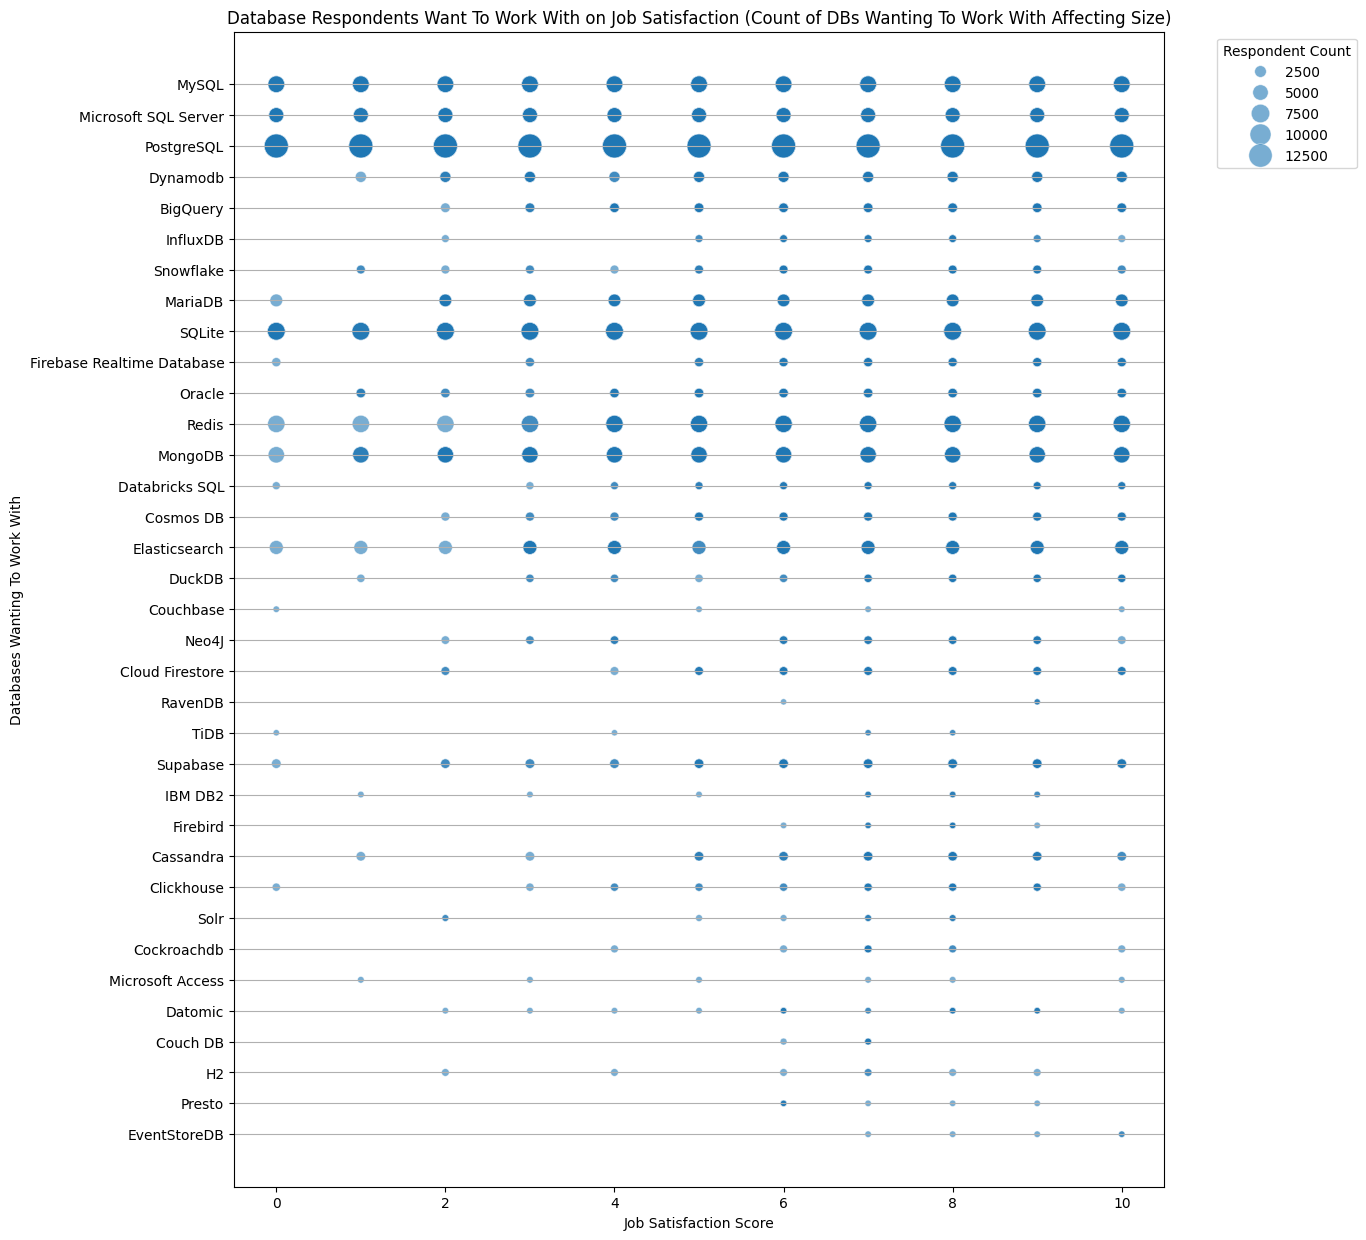

In [8]:
## Write your code here
# Pulling Data
query = '''
SELECT DatabaseWantToWorkWith, JobSat
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
AND JobSat IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Cleaning Data
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df['LanguageList'] = df['DatabaseWantToWorkWith'].str.split(';')
df_exploded = df.explode('LanguageList')
df_exploded['LanguageList'] = df_exploded['LanguageList'].str.strip()
df_lang_count = df_exploded['LanguageList'].value_counts().reset_index()
df_lang_count.columns = ['DatabaseWantToWorkWith', 'RespondentCount']
df_exploded = df_exploded.merge(df_lang_count, on='DatabaseWantToWorkWith')


# Plotting Data
plt.figure(figsize=(12,15))
sns.scatterplot(data=df_exploded, x='JobSat', y='DatabaseWantToWorkWith',
                size='RespondentCount', sizes= (20,300), alpha= 0.6,
                legend= True
               )
plt.title('Database Respondents Want To Work With on Job Satisfaction (Count of DBs Wanting To Work With Affecting Size)')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Databases Wanting To Work With')
plt.legend(title='Respondent Count', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()

### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


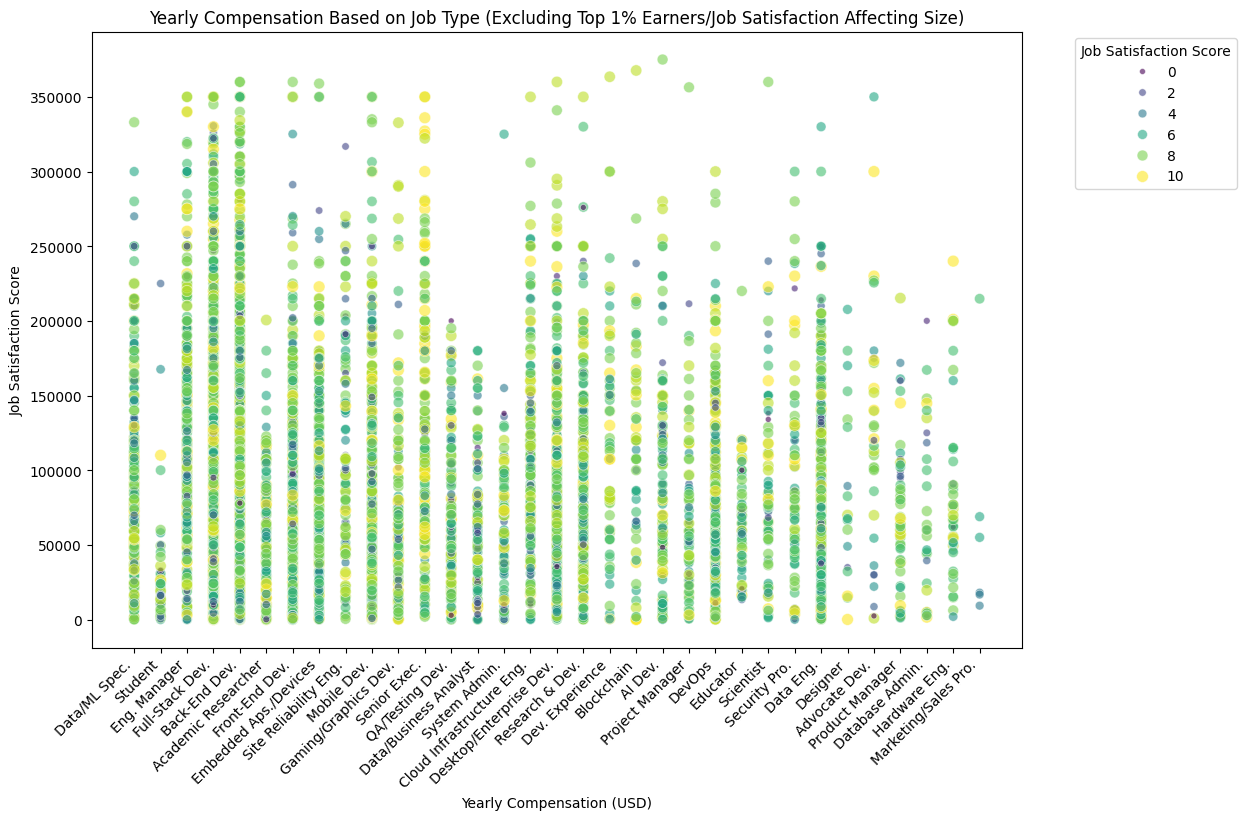

In [9]:
## Write your code here
# Pulling Data
query = '''
SELECT ConvertedCompYearly, DevType, JobSat
FROM main
WHERE ConvertedCompYearly IS NOT NULL
AND DevType IS NOT NULL
AND JobSat IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Cleaning Data
df = df[df['ConvertedCompYearly'] < df['ConvertedCompYearly'].quantile(0.99)]
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df['DevType'] = df.loc[:, 'DevType'].map(mapping_devtype)
df.dropna(subset=['DevType', 'ConvertedCompYearly', 'JobSat'], inplace=True)


# Plotting Data
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='DevType', y='ConvertedCompYearly',
                size='JobSat', hue='JobSat', palette='viridis', alpha=0.6,
                legend=True)
plt.title('Yearly Compensation Based on Job Type (Excluding Top 1% Earners/Job Satisfaction Affecting Size)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Satisfaction Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


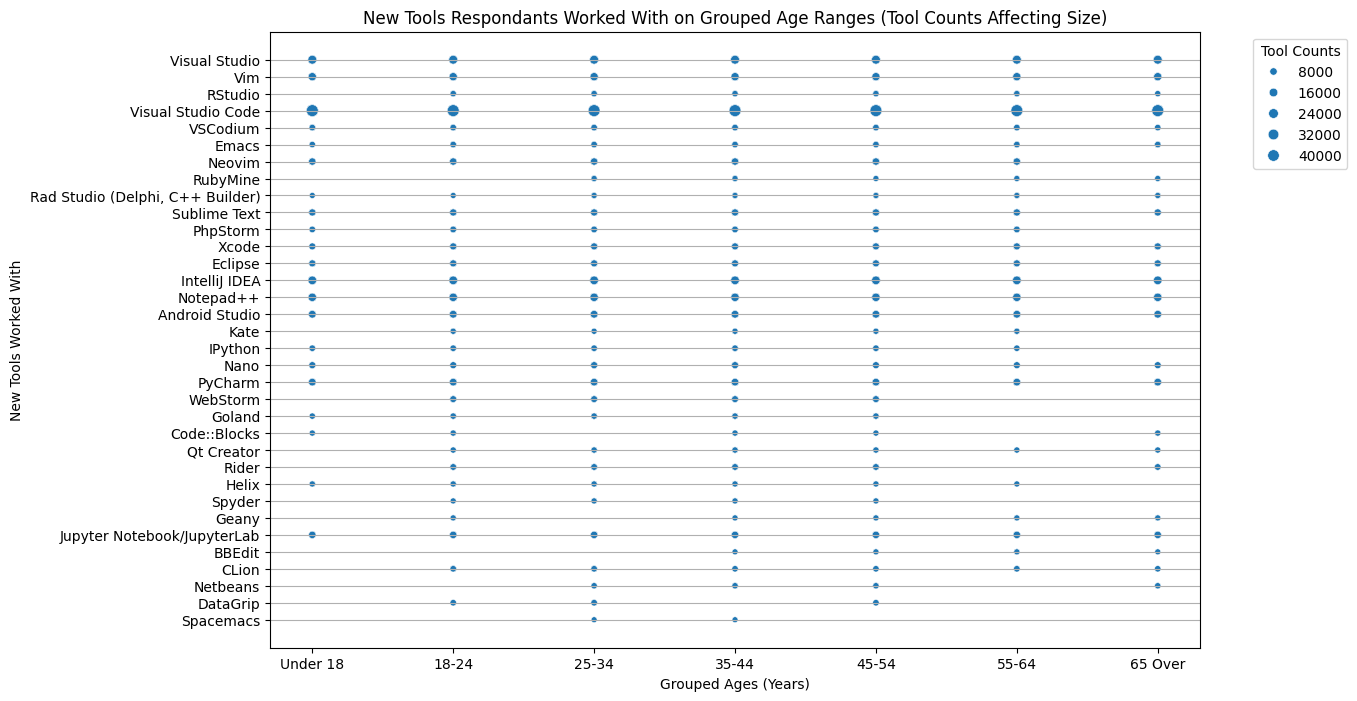

In [10]:
## Write your code here
# Pulling Data
query = '''
SELECT Age, NEWCollabToolsHaveWorkedWith
FROM main
WHERE Age IS NOT NULL
AND NEWCollabToolsHaveWorkedWith IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Cleaning Data
df['Age'] = df.loc[:, 'Age'].map(mapping_age_text)
df['CollabList'] = df['NEWCollabToolsHaveWorkedWith'].str.split(';')
df_exploded = df.explode('CollabList')
df_exploded['CollabList'] = df_exploded['CollabList'].str.strip()
df_collab_count = df_exploded['CollabList'].value_counts().reset_index()
df_collab_count.columns = ['NEWCollabToolsHaveWorkedWith', 'RespondentCount']
df_exploded = df_exploded.merge(df_collab_count, on='NEWCollabToolsHaveWorkedWith')
df_exploded.dropna(subset=['Age', 'NEWCollabToolsHaveWorkedWith'], inplace=True)


# Setting up x-axis for Age Categories
age_groups = ['Under 18', '18-24', '25-34', '35-44', '45-54',
              '55-64', '65 Over']
df_exploded['Age'] = pd.Categorical(df_exploded['Age'], categories=age_groups, ordered=True)

# Plotting Data
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_exploded, x='Age', y='NEWCollabToolsHaveWorkedWith',
                size='RespondentCount', legend=True)
plt.title('New Tools Respondants Worked With on Grouped Age Ranges (Tool Counts Affecting Size)')
plt.xlabel('Grouped Ages (Years)')
plt.ylabel('New Tools Worked With')
plt.grid(axis='y')
plt.legend(title='Tool Counts', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



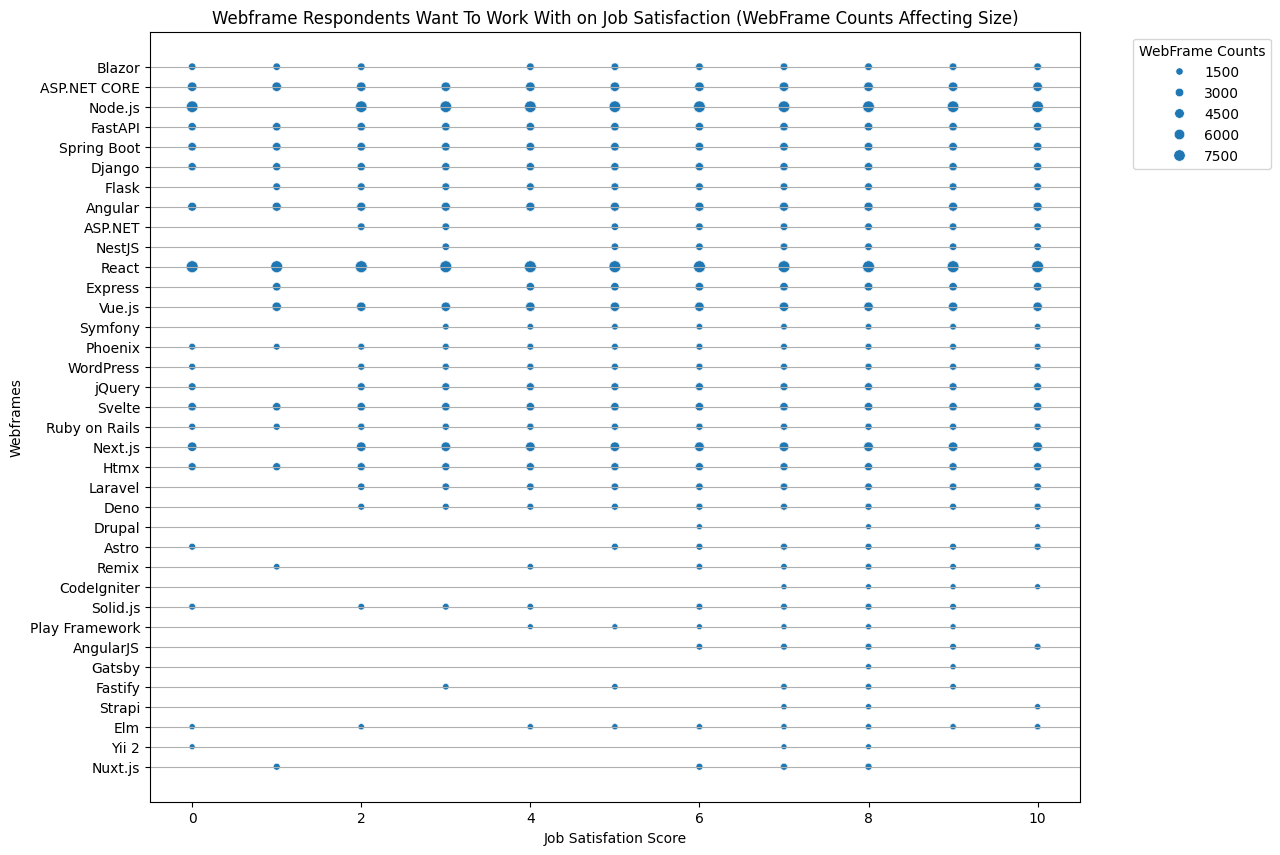

In [11]:
## Write your code here
# Pulling Data
query = '''
SELECT WebframeWantToWorkWith, JobSat
FROM main
WHERE WebframeWantToWorkWith IS NOT NULL
AND JobSat IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Cleaning Data
df['WebList'] = df['WebframeWantToWorkWith'].str.split(';')
df_exploded = df.explode('WebList')
df_exploded['WebList'] = df_exploded['WebList'].str.strip()
df_collab_count = df_exploded['WebList'].value_counts().reset_index()
df_collab_count.columns = ['WebframeWantToWorkWith', 'RespondentCount']
df_exploded = df_exploded.merge(df_collab_count, on='WebframeWantToWorkWith')

# Plotting Data
plt.figure(figsize=(12,10))
sns.scatterplot(data=df_exploded, x='JobSat', y='WebframeWantToWorkWith',
                size='RespondentCount', legend=True)
plt.title('Webframe Respondents Want To Work With on Job Satisfaction (WebFrame Counts Affecting Size)')
plt.xlabel('Job Satisfation Score')
plt.ylabel('Webframes')
plt.grid(axis='y')
plt.legend(title='WebFrame Counts', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



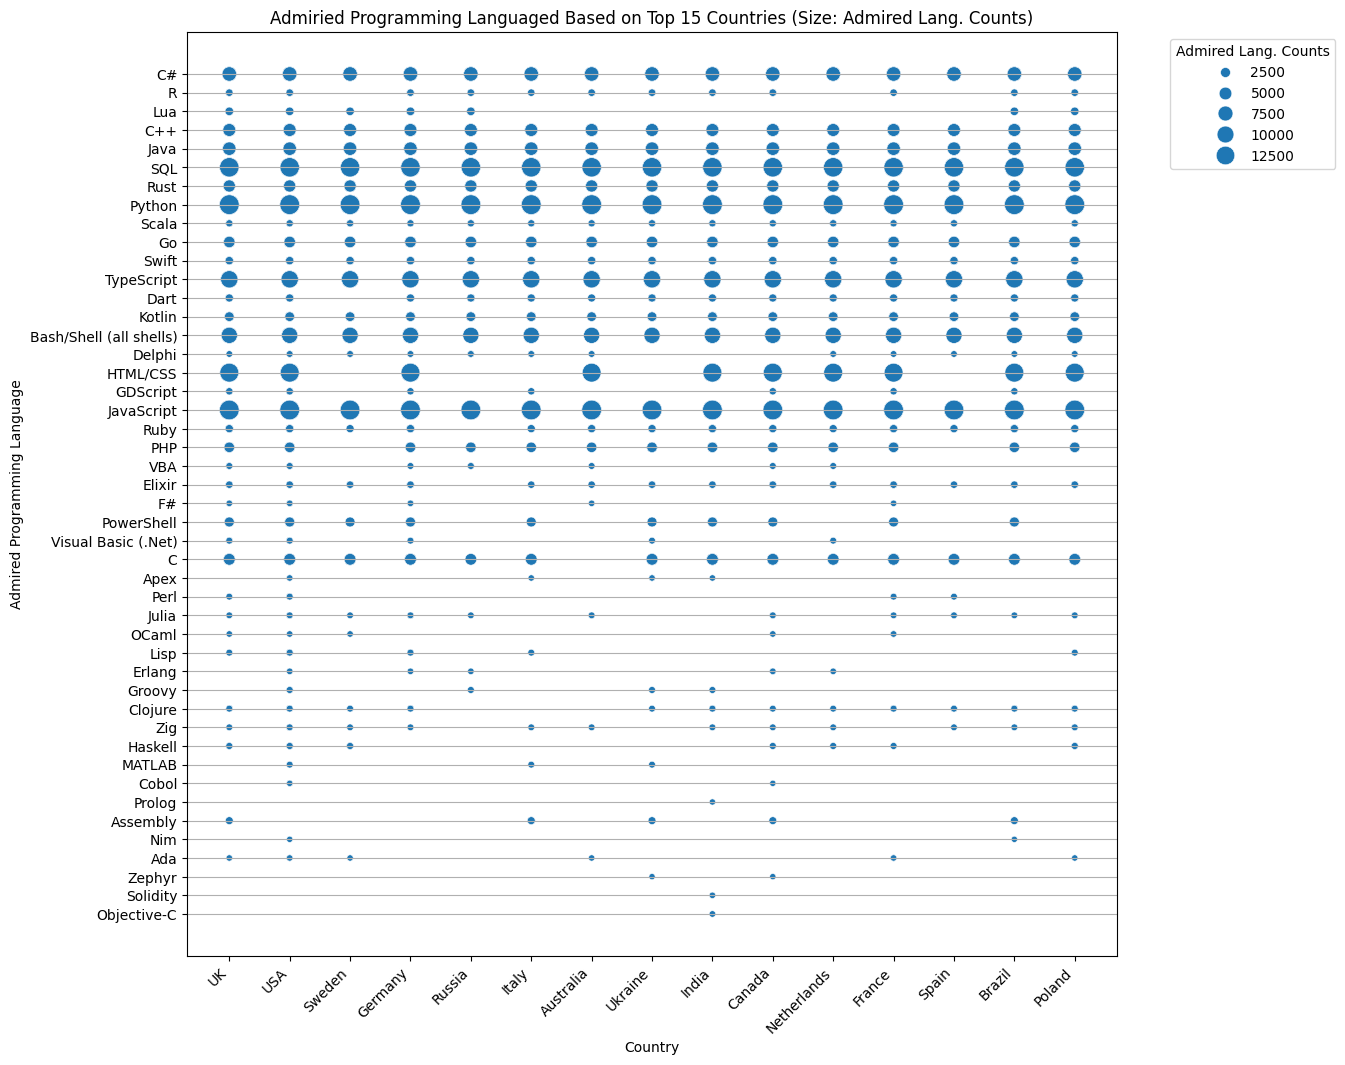

In [12]:
## Write your code here
# Pulling Data
query = '''
SELECT LanguageAdmired, Country
FROM main
WHERE LanguageAdmired IS NOT NULL
AND Country IS NOT NULL
'''
df = pd.read_sql_query(query, conn)

# Cleaning Data
country_list = df['Country'].value_counts().head(15).index.to_list()
df_filtered = df[df['Country'].isin(country_list)].copy()
df_filtered['Country'] = df_filtered.loc[:, 'Country'].replace(mapping_country)
df_filtered['LangAdList'] = df_filtered['LanguageAdmired'].str.split(';')
df_exploded = df_filtered.explode('LangAdList')
df_exploded['LangAdList'] = df_exploded['LangAdList'].str.strip()
df_langad_count = df_exploded['LangAdList'].value_counts().reset_index()
df_langad_count.columns = ['LanguageAdmired', 'RespondentCount']
df_exploded = df_exploded.merge(df_langad_count, on='LanguageAdmired')

# Plotting Data
plt.figure(figsize=(12,12))
sns.scatterplot(data=df_exploded, x='Country', y='LanguageAdmired',
                size='RespondentCount', sizes=(20,200), legend=True)
plt.title('Admiried Programming Languaged Based on Top 15 Countries (Size: Admired Lang. Counts)')
plt.xlabel('Country')
plt.ylabel('Admired Programming Language')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.legend(title='Admired Lang. Counts', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [13]:
# Final step is closing the DB connection
conn.close()

## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
